# Seaborn - 고급 그래프
: Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급 버전

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Seaborn package에서 제공하는 titanic 데이터셋 가져오기
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 회귀선이 있는 산점도 

In [5]:
import matplotlib.pyplot as plt

In [6]:
sns.set_style('darkgrid') # darkgrid, whitegird, dark , white , ticks

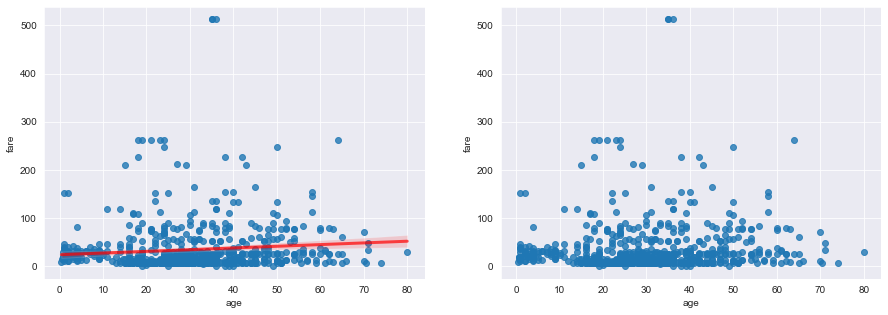

In [7]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형 회귀선이 포함된 그래프 그리기
sns.regplot(
    x = 'age',
    y = 'fare',
    data = titanic,
    line_kws= {'color':'r','alpha':0.7,'lw':3},
    ax = ax1
)

# 선형 회귀선이 미포함됨 그래프 그리기
sns.regplot(
    x = 'age',
    y = 'fare',
    data = titanic,
    ax = ax2,
    fit_reg = False
)

plt.show()

---
### 히스토그램 / 커널밀도그래프
: 커널밀도 함수는 그래프와 X축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수

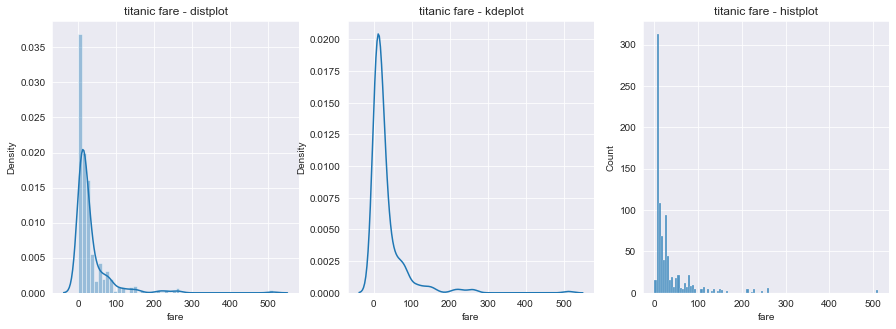

In [8]:
# 히스토그램 ,커널밀도그래프, 히스토그램 + 커널밀도그래프 그리기

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 히스토그램 / 커널 밀도
sns.distplot(titanic['fare'],ax=ax1)

# 커널 밀도
sns.kdeplot(titanic['fare'],ax=ax2)

# 히스토그램 (빈도수를 나타내는 그래프이므로 y축은 count)
# sns.histplot(titanic['fare'],ax=ax3)
sns.histplot(x='fare',data=titanic,ax=ax3)

# 차트제목
ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kdeplot')
ax3.set_title('titanic fare - histplot')

plt.show()

> fare(운임)가 대부분 100달러 미만에 집중되어 있다.

---
### 히트맵(heatmap)
- 2개의 범주형 변수를 각각 x,y축에 놓고 데이터를 매트릭스 형태로 분류

In [9]:
table = titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')
# size => 성별을 기준으로 각 class별 개수로 판단 
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


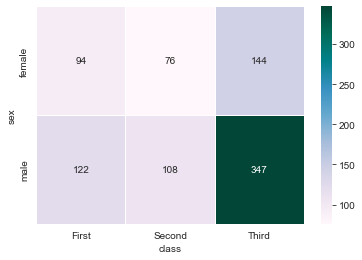

In [10]:
sns.heatmap(
    table,
    annot= True,
    fmt = 'd', # annotation을 정수로 나타냄 , 'f' => 실수
    linewidths= 0.5, # 각 cell의 간격너비
    cmap = 'PuBuGn',
    cbar= True
)

plt.show()

### 범주형 데이터의 산점도
- 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인

In [11]:
sns.set_style('whitegrid')

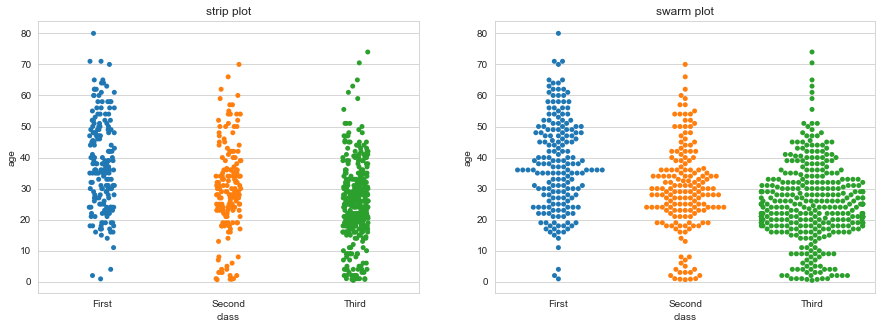

In [12]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax = ax1 
)

sns.swarmplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax = ax2 
)

# 차트 제목
ax1.set_title('strip plot')
ax2.set_title('swarm plot')
plt.show()

# stripplot의 단점 -> 중복된 값을 알 수 없음   ----> swarmplot으로 퍼진정도에 의해 확인

### 막대 그래프

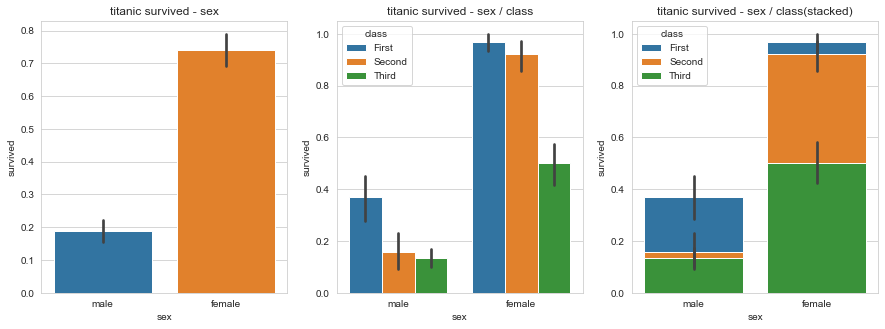

In [13]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# x, y축의 변수 할당
sns.barplot(
    x = 'sex',
    y = 'survived',
    data = titanic,
    ax = ax1,
    # ci='sd' # 표준편차에 대한 그래프로 나타내기
)

# x, y, hue (class 별 그래프 보임)
sns.barplot(
    x = 'sex',
    y = 'survived',
    hue = 'class',
    data = titanic,
    ax = ax2,
    # ci='sd' # 표준편차에 대한 그래프로 나타내기
)


# x, y, hue
sns.barplot(
    x = 'sex',
    y = 'survived',
    hue = 'class',
    dodge= False,
    data = titanic,
    ax = ax3,
    # ci='sd' # 표준편차에 대한 그래프로 나타내기
)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex / class')
ax3.set_title('titanic survived - sex / class(stacked)')
plt.show()

그래프 [1] 오차막대(error bar) (남자에 대한 오차범위 적다 -> 데이터가 작으니까)      
survived는 0과 1만 가지므로 이를 계산한 값을 막대로 나타냄, 또 y축은 count가 아님      
=> 남자는 20%미만의 생존률을 보이지만 오차가 적고 여자는 70이상의 생존률을 보이지만 오차가 크다       
오차막대의 길이를 통해 해당 데이터의 밀도가 촘촘한지 아닌지에 따라 길이 줄고 짧아짐

그래프 [3] 누적막대 그래프 (그래프[2]를 측면으로 본 단면)

---
### 빈도 그래프

In [16]:
sns.set_style('whitegrid')

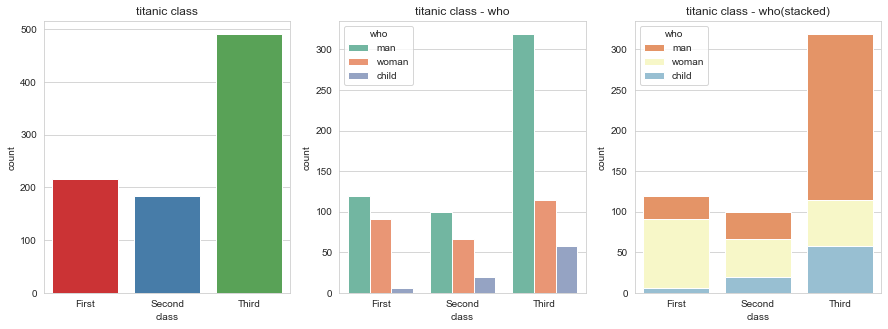

In [34]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot(
    x = 'class',
    data = titanic,
    palette= 'Set1',
    ax = ax1
)
sns.countplot(
    x = 'class',
    hue= 'who',
    data = titanic,
    palette= 'Set2',
    ax = ax2
)
sns.countplot(
    x = 'class',
    hue= 'who',
    data = titanic,
    dodge=False,
    palette= 'RdYlBu',
    ax = ax3
)


ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')
plt.show()

---
# 박스플롯 / 바이올린 그래프
- 박스플롯은 범주형 데이터의 분포와 주요 통계지표를 함께 제공하지만 데이터가 퍼져있는 분산의 정도를 알기 어렵다.
- 바이올린 그래프 : 박스플롯에 커널 밀도 함수 그래프가 추가 

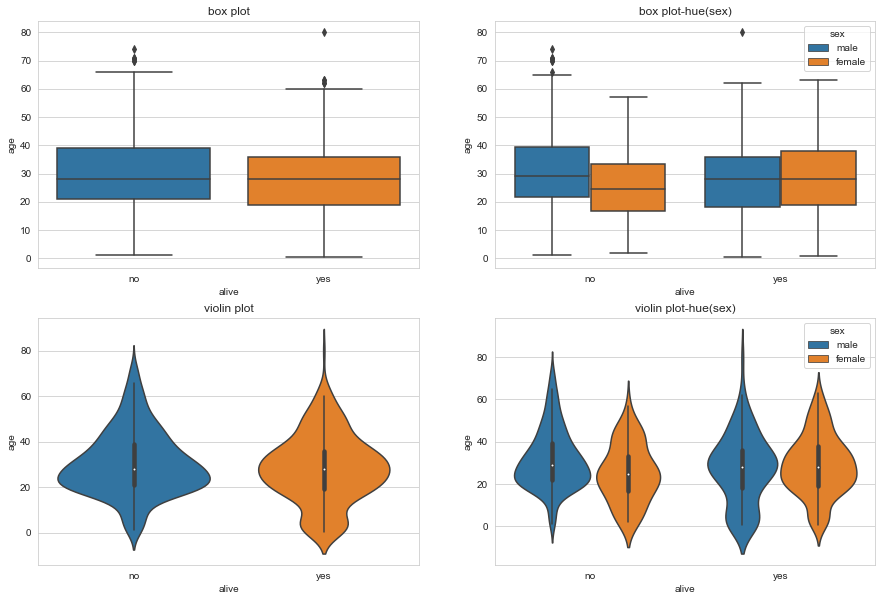

In [46]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


# boxplot : 기본값
sns.boxplot(
    x = 'alive',
    y = 'age',
    data = titanic,
    ax= ax1
)

# boxplot : 기본값 - hue:sex
sns.boxplot(
    x = 'alive',
    y = 'age',
    hue = 'sex',
    data = titanic,
    ax= ax2
)

# violinplot : 기본값
sns.violinplot(
    x = 'alive',
    y = 'age',
    data = titanic,
    ax= ax3
)

# violinplot : 기본값 - hue:sex
sns.violinplot(
    x = 'alive',
    y = 'age',
    hue = 'sex',
    data = titanic,
    ax= ax4
)

ax1.set_title('box plot')
ax2.set_title('box plot-hue(sex)')
ax3.set_title('violin plot')
ax4.set_title('violin plot-hue(sex)')
plt.show()

> 바이올린그래프를 통해 밀도를 알 수 있음 -> 어느 부분에 많이 분포 되어있는지...

---
### 조인트 그래프
- 산점도를 기본으로 표시하고 각 축에 대한 히스토그램을 동시 제공

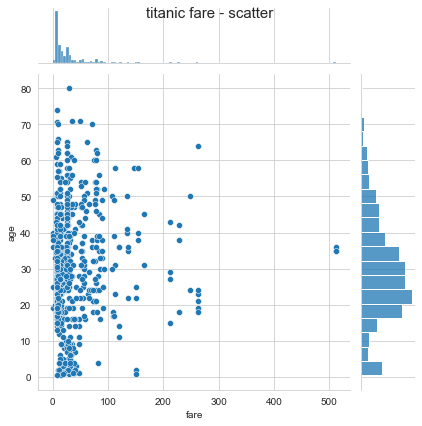

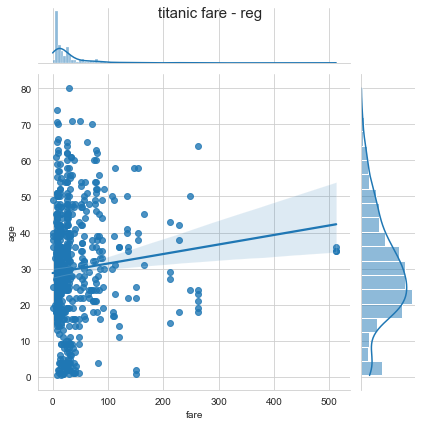

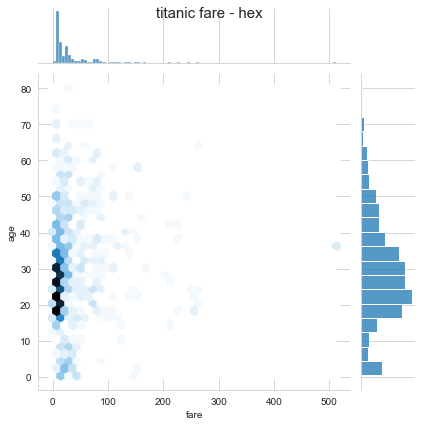

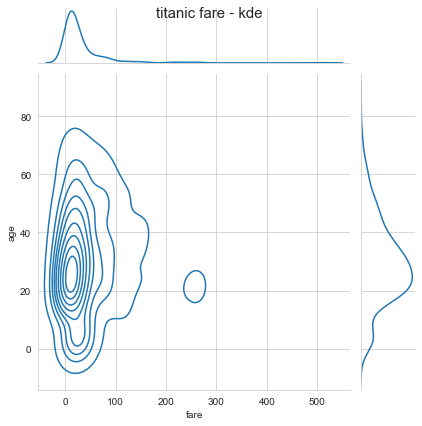

In [53]:
# 조인트 그래프 : 산점도 (기본값)
j1 = sns.jointplot(
    x = 'fare',
    y = 'age',
    data = titanic,
)

# 조인트 그래프 : 회귀선
j2 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind = 'reg',
    data = titanic,
)

# 조인트 그래프 : 육각 그래프
j3 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind = 'hex',
    data = titanic,
)

# 조인트 그래프 : 커널 밀집 그래프
j4 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind = 'kde',
    data = titanic,
)

j1.fig.suptitle('titanic fare - scatter',size =15)
j2.fig.suptitle('titanic fare - reg',size =15)
j3.fig.suptitle('titanic fare - hex',size =15)
j4.fig.suptitle('titanic fare - kde',size =15)
plt.show()

---
### 조건을 적용하여 화면을 그리드로 분할하기

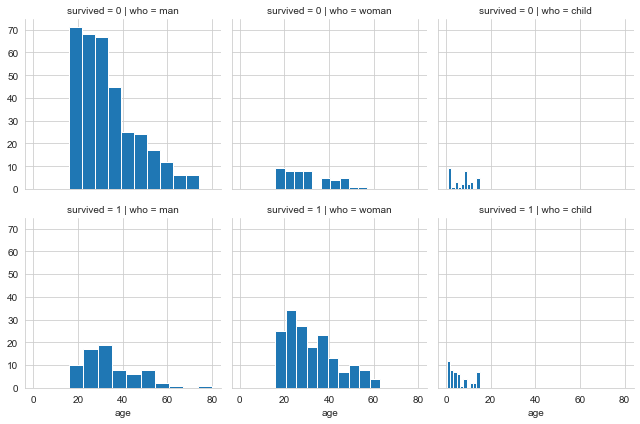

In [55]:
# 조건에 따라 Grid 나누기
g = sns.FacetGrid(
    data = titanic,
    col = 'who',
    row = 'survived'
)
g = g.map(plt.hist,'age') 

---
### 이변수 데이터 분포
- 매트릭스 형태로 짝을 지어 표현

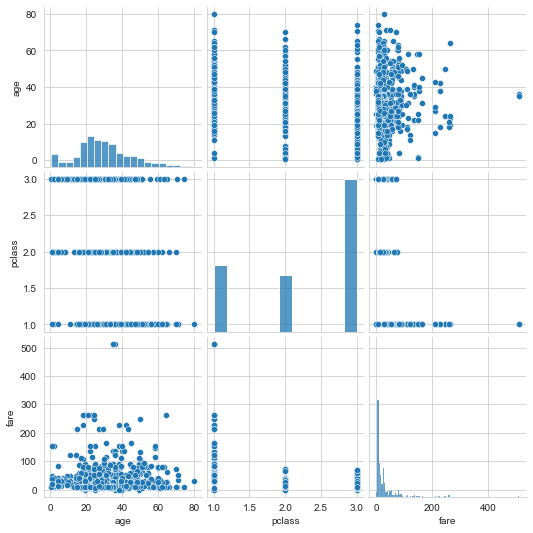

In [56]:
# titanic 데이터 셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass','fare']]

# 조건에 따라 그리드 나누기
sns.pairplot(titanic_pair)

plt.show()